In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My drive/'

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance


In [0]:
from subprocess import check_output
print(check_output(["ls", "/content/drive/My Drive/"]).decode("utf8"))

In [0]:
edm = pd.read_csv('/content/drive/My Drive/xAPI-Edu-Data.csv')
#edm
edm.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [0]:
edm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [0]:
edm.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality','raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},inplace=True)

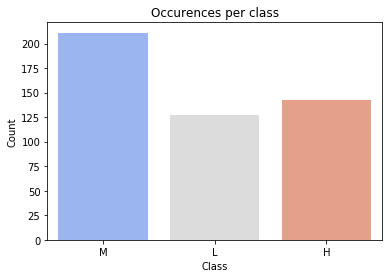

In [0]:
counts = sns.countplot(x='Class', data=edm, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

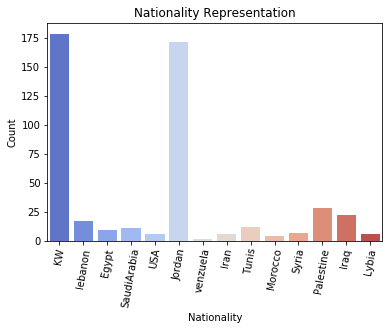

In [0]:
nat = sns.countplot(x='Nationality', data=edm, palette='coolwarm')
nat.set(xlabel='Nationality', ylabel='Count', title='Nationality Representation')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.show()

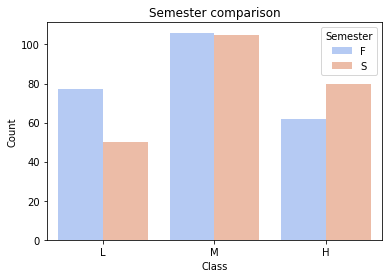

In [0]:
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=edm, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

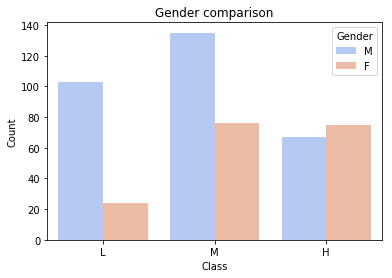

In [0]:
plot = sns.countplot(x='Class', hue='Gender', data=edm, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

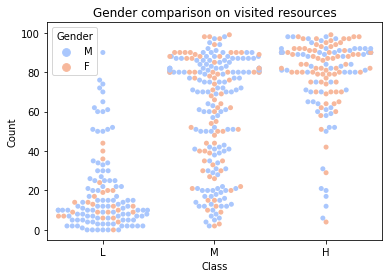

In [0]:
plot = sns.swarmplot(x='Class', y='VisitedResources', hue='Gender', order=['L', 'M', 'H'], data=edm, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(20,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  s)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by 

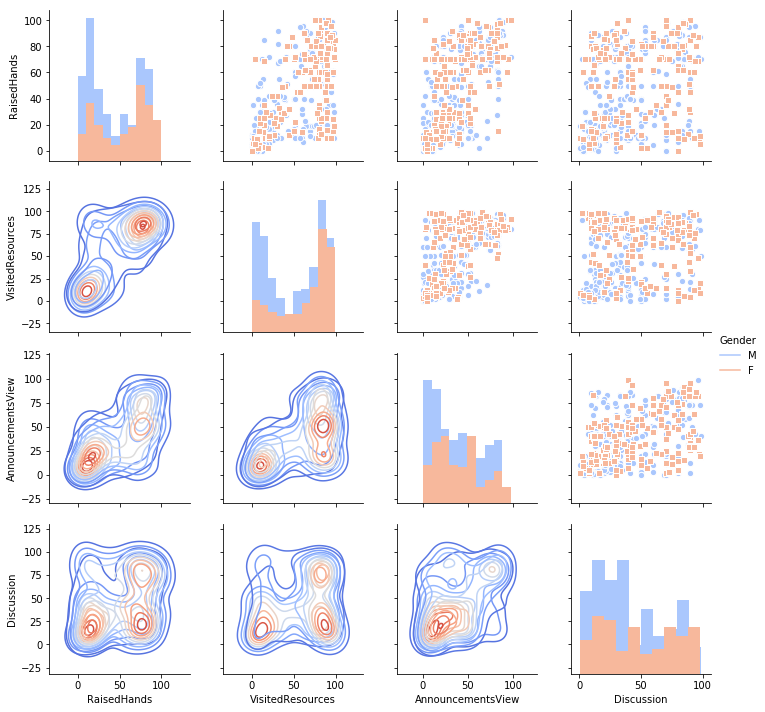

In [0]:
g = sns.PairGrid(edm, hue='Gender', palette='coolwarm', hue_kws={'marker': ['o', 's']})
g = g.map_diag(plt.hist)
g = g.map_upper(plt.scatter, linewidths=1, edgecolor='w', s=40)
g = g.map_lower(sns.kdeplot, lw=3, legend=False, cmap='coolwarm')
g = g.add_legend()

In [0]:
X = edm.drop('Class', axis=1)
y = edm['Class']

# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)


In [0]:
# Logistic Regression as baseline, then exploring tree-based methods

keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=52)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    #print(X_test)
    print(pred)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['L' 'M' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'H' 'M'
 'H' 'M' 'H' 'H' 'L' 'L' 'H' 'L' 'M' 'H' 'M' 'L' 'M' 'H' 'L' 'M' 'M' 'L'
 'L' 'M' 'H' 'L' 'M' 'M' 'M' 'M' 'H' 'L' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'M'
 'H' 'L' 'H' 'L' 'L' 'H' 'L' 'H' 'M' 'M' 'M' 'H' 'L' 'L' 'H' 'M' 'M' 'H'
 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'H' 'M' 'M'
 'L' 'M' 'M' 'H' 'M' 'H' 'L' 'L' 'H' 'H' 'M' 'L' 'H' 'L' 'L' 'M' 'L' 'M'
 'H' 'M' 'M' 'H' 'H' 'H' 'M' 'L' 'H' 'M' 'M' 'M' 'H' 'H' 'M' 'M' 'L' 'L'
 'M' 'L' 'M' 'M' 'M' 'H' 'H' 'H' 'L' 'M' 'H' 'L' 'M' 'H' 'H' 'M' 'L' 'M']
Results for: Logistic Regression

[[37  1 14]
 [ 0 32  4]
 [ 8  7 41]]
              precision    recall  f1-score   support

           H       0.82      0.71      0.76        52
           L       0.80      0.89      0.84        36
           M       0.69      0.73      0.71        56

   micro avg       0.76      0.76      0.76       144
   macro avg       0.77      0.78      0.77       144
weighted avg      

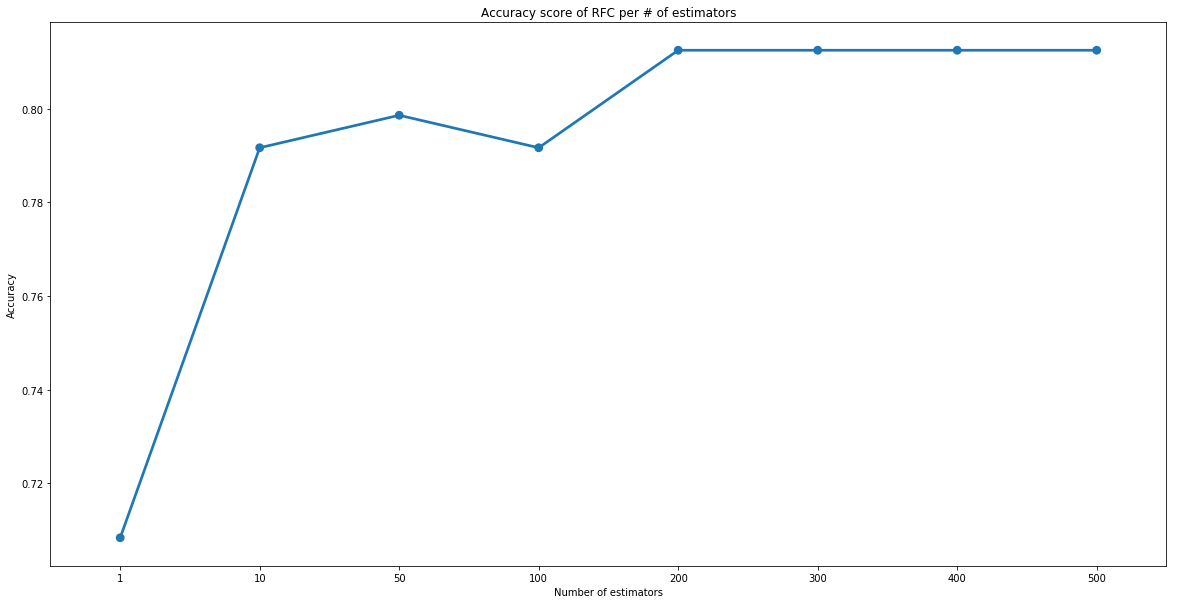

In [0]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

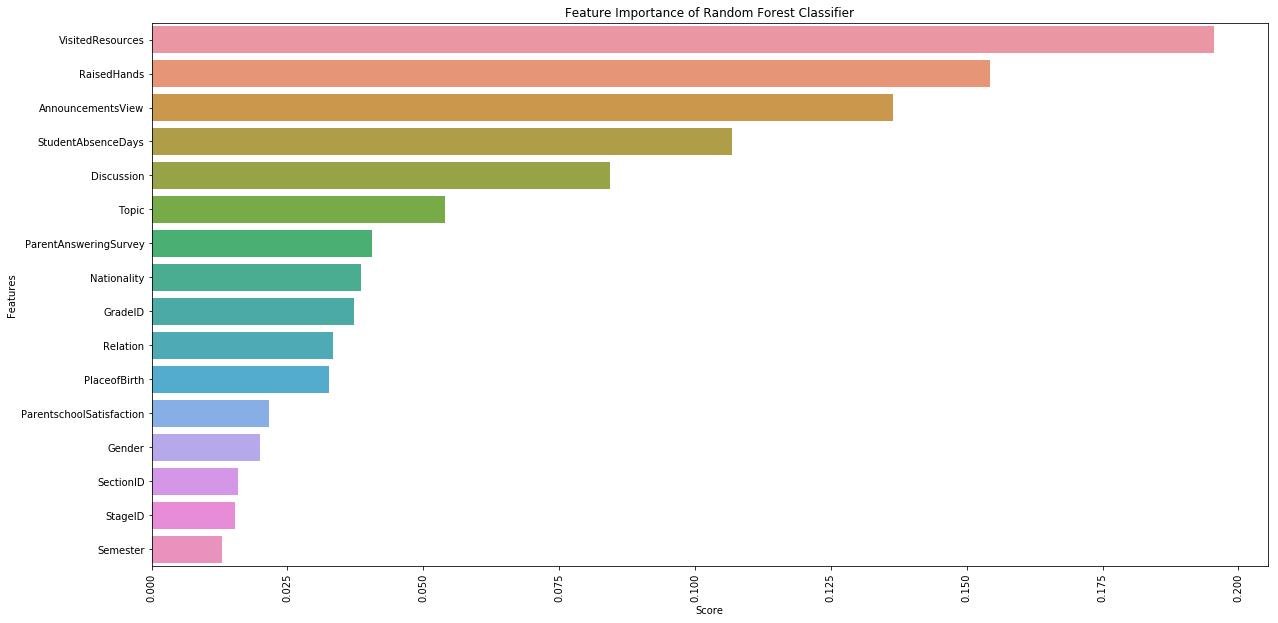

In [0]:
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()
